## Импорт библиотек

In [34]:
import numpy as np
from pandas import DataFrame as df, read_csv, get_dummies, merge
from matplotlib import pyplot as plt 
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

from sklearn.ensemble import GradientBoostingRegressor

from sklearn.metrics import r2_score as r2
from sklearn.metrics import mean_squared_error as mse

import warnings
warnings.filterwarnings('ignore')

In [35]:
plt.style.use('fivethirtyeight')

%config InlineBackend.figure_format = 'svg'
%matplotlib inline

## Загрузка тестовых данных

In [36]:
dataset_train, dataset_test = read_csv('dataset/train.csv'), read_csv('dataset/test.csv')

## Проверим данные

In [37]:
dataset_train.head(5)

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
0,11809,27,3.0,115.027311,NaN,10.0,4,10.0,2014,0.075424,B,B,11,3097,0,NaN,0,0,B,305018.871089
1,3013,22,1.0,39.832524,23.169223,8.0,7,8.0,1966,0.118537,B,B,30,6207,1,1183.0,1,0,B,177734.553407
2,8215,1,3.0,78.342215,47.671972,10.0,2,17.0,1988,0.025609,B,B,33,5261,0,240.0,3,1,B,282078.720850
3,2352,1,1.0,40.409907,NaN,1.0,10,22.0,1977,0.007122,B,B,1,264,0,NaN,0,1,B,168106.007630
4,13866,94,2.0,64.285067,38.562517,9.0,16,16.0,1972,0.282798,B,B,33,8667,2,NaN,0,6,B,343995.102962


In [38]:
dataset_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             10000 non-null  int64  
 1   DistrictId     10000 non-null  int64  
 2   Rooms          10000 non-null  float64
 3   Square         10000 non-null  float64
 4   LifeSquare     7887 non-null   float64
 5   KitchenSquare  10000 non-null  float64
 6   Floor          10000 non-null  int64  
 7   HouseFloor     10000 non-null  float64
 8   HouseYear      10000 non-null  int64  
 9   Ecology_1      10000 non-null  float64
 10  Ecology_2      10000 non-null  object 
 11  Ecology_3      10000 non-null  object 
 12  Social_1       10000 non-null  int64  
 13  Social_2       10000 non-null  int64  
 14  Social_3       10000 non-null  int64  
 15  Healthcare_1   5202 non-null   float64
 16  Helthcare_2    10000 non-null  int64  
 17  Shops_1        10000 non-null  int64  
 18  Shops_2

In [39]:
dataset_train.describe()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Price
count,10000.00000,10000.000000,10000.000000,10000.000000,7887.000000,10000.000000,10000.000000,10000.000000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,5202.000000,10000.000000,10000.000000,10000.000000
mean,8383.40770,50.400800,1.890500,56.315775,37.199645,6.273300,8.526700,12.609400,3.990166e+03,0.118858,24.687000,5352.157400,8.039200,1142.904460,1.319500,4.231300,214138.857399
std,4859.01902,43.587592,0.839512,21.058732,86.241209,28.560917,5.241148,6.775974,2.005003e+05,0.119025,17.532614,4006.799803,23.831875,1021.517264,1.493601,4.806341,92872.293865
min,0.00000,0.000000,0.000000,1.136859,0.370619,0.000000,1.000000,0.000000,1.910000e+03,0.000000,0.000000,168.000000,0.000000,0.000000,0.000000,0.000000,59174.778028
25%,4169.50000,20.000000,1.000000,41.774881,22.769832,1.000000,4.000000,9.000000,1.974000e+03,0.017647,6.000000,1564.000000,0.000000,350.000000,0.000000,1.000000,153872.633942
50%,8394.50000,36.000000,2.000000,52.513310,32.781260,6.000000,7.000000,13.000000,1.977000e+03,0.075424,25.000000,5285.000000,2.000000,900.000000,1.000000,3.000000,192269.644879
75%,12592.50000,75.000000,2.000000,65.900625,45.128803,9.000000,12.000000,17.000000,2.001000e+03,0.195781,36.000000,7227.000000,5.000000,1548.000000,2.000000,6.000000,249135.462171
max,16798.00000,209.000000,19.000000,641.065193,7480.592129,2014.000000,42.000000,117.000000,2.005201e+07,0.521867,74.000000,19083.000000,141.000000,4849.000000,6.000000,23.000000,633233.466570


## Функция обработки данных, исправления выбросов и создания фич

In [40]:
def data_pipeline(df_train: df, df_test):

    district_frame = df_train[['DistrictId', 'Price']].groupby(by='DistrictId').mean()
    def avg_district_price(district_num):
        try:
            avg_price = district_frame.loc[district_num, 'Price']
        except:
            avg_price = 0      
        return avg_price
    
    
    # очищаем выбросы/пропуски, дополняем параметроми 
    df_train.loc[df_train['Rooms'] == 0, 'Rooms'] = df_train['Rooms'].mean() 
    df_test.loc[df_test['Rooms'] == 0, 'Rooms'] = df_train['Rooms'].mean() 
    
    df_train.loc[(df_train.Square > df_train['Square'].quantile(q=0.95)) & (df_train.Rooms < df_train['Square'].quantile(q=0.1)), 'Square'] = df_train['Square'].quantile(q=0.5)
    df_test.loc[(df_test.Square > df_train['Square'].quantile(q=0.95)) & (df_test.Rooms < df_train['Square'].quantile(q=0.1)), 'Square'] = df_train['Square'].quantile(q=0.5)
    
    df_train.loc[df_train.LifeSquare.isna(), 'LifeSquareIsEmpty'] = 1
    df_test.loc[df_test.LifeSquare.isna(), 'LifeSquareIsEmpty'] = 1
    
    df_train.loc[df_train.LifeSquare.isna(), 'LifeSquare'] = 0
    df_test.loc[df_test.LifeSquare.isna(), 'LifeSquare'] = 0
    
    df_train.loc[df_train.LifeSquareIsEmpty.isna(), 'LifeSquareIsEmpty'] = 0
    df_test.loc[df_test.LifeSquareIsEmpty.isna(), 'LifeSquareIsEmpty'] = 0
    
    df_train.loc[df_train.HouseYear > 2020, 'HouseYear'] = df_train['HouseYear'].quantile(q=0.5)
    df_test.loc[df_test.HouseYear > 2020, 'HouseYear'] = df_train['HouseYear'].quantile(q=0.5)
    
    df_train.loc[df_train['Healthcare_1'].isna(), 'Healthcare_1_Is_Empty'] = 1
    df_test.loc[df_test['Healthcare_1'].isna(), 'Healthcare_1_Is_Empty'] = 1
    
    df_train.loc[df_train['Healthcare_1'].isna(), 'Healthcare_1'] = 0
    df_test.loc[df_test['Healthcare_1'].isna(), 'Healthcare_1'] = 0
    
    df_train.loc[df_train['Healthcare_1_Is_Empty'].isna(), 'Healthcare_1_Is_Empty'] = 0
    df_test.loc[df_test['Healthcare_1_Is_Empty'].isna(), 'Healthcare_1_Is_Empty'] = 0
    
    df_train.loc[(df_train.KitchenSquare > df_train['KitchenSquare'].quantile(q=0.9)) & (df_train.KitchenSquare < df_train['KitchenSquare'].quantile(q=1)), 'KitchenSquare'] = df_train['KitchenSquare'].quantile(q=0.5)
    df_test.loc[(df_test.KitchenSquare > df_train['KitchenSquare'].quantile(q=0.9)) & (df_test.KitchenSquare < df_train['KitchenSquare'].quantile(q=1)), 'KitchenSquare'] = df_train['KitchenSquare'].quantile(q=0.5)

    df_train.loc[df_train['LifeSquare'] > df_train['Square'], 'Square'] = df_train['Square'].quantile(q=0.5)
    df_test.loc[df_test['LifeSquare'] > df_test['Square'], 'Square'] = df_train['Square'].quantile(q=0.5)
    
    df_train = get_dummies(df_train, prefix=['Ecology_2', 'Ecology_3', 'Shops_2'], prefix_sep='_', dummy_na=True, columns=['Ecology_2', 'Ecology_3', 'Shops_2'])
    df_test = get_dummies(df_test, prefix=['Ecology_2', 'Ecology_3', 'Shops_2'], prefix_sep='_', dummy_na=True, columns=['Ecology_2', 'Ecology_3', 'Shops_2'])
    
#     df_train = get_dummies(df_train, prefix='Ecology_3', prefix_sep='_', dummy_na=False, columns=['Ecology_3'])
#     df_test = get_dummies(df_test, prefix='Ecology_3', prefix_sep='_', dummy_na=False, columns=['Ecology_3'])
    
#     df_train = get_dummies(df_train, prefix='Shops_2', prefix_sep='_', dummy_na=False, columns=['Shops_2'])
#     df_test = get_dummies(df_test, prefix='Shops_2', prefix_sep='_', dummy_na=False, columns=['Shops_2'])
    
    # new feature
    df_train['District_mean_price'] = df_train['DistrictId'].map(avg_district_price)
    df_test['District_mean_price'] = df_test['DistrictId'].map(avg_district_price)
        
    return df_train, df_test

## Применяем функцию подготовки данных

In [41]:
dataset_train, dataset_test = data_pipeline(dataset_train, dataset_test)

несколько идей по подготовке данных:
    поработаем с параметрами LifeSquare, Healthcare_1 поскольку в них есть NA - готово
    преобразуем HouseYear в параметр количество лет от ввода в эксплуатацию (больше - хуже) - не стал, убрал ошибки, заменил на квартиль 50%, так как средняя и медиана кривые
    Rooms имеет нулевые значения, установим медианнные - готово
    Square имеет выбросы и нулевые значения, заменим медианными - исправлено руками
    LifeSquare имеет выброс, заменим медианными - не заменял, оставил параметр, что значения нет
    KitchenSquare имеет выбросы, заменим медианными - не заменял, оставил параметр, что значения нет

## Взглянем на хитмап корреляции параметров данных

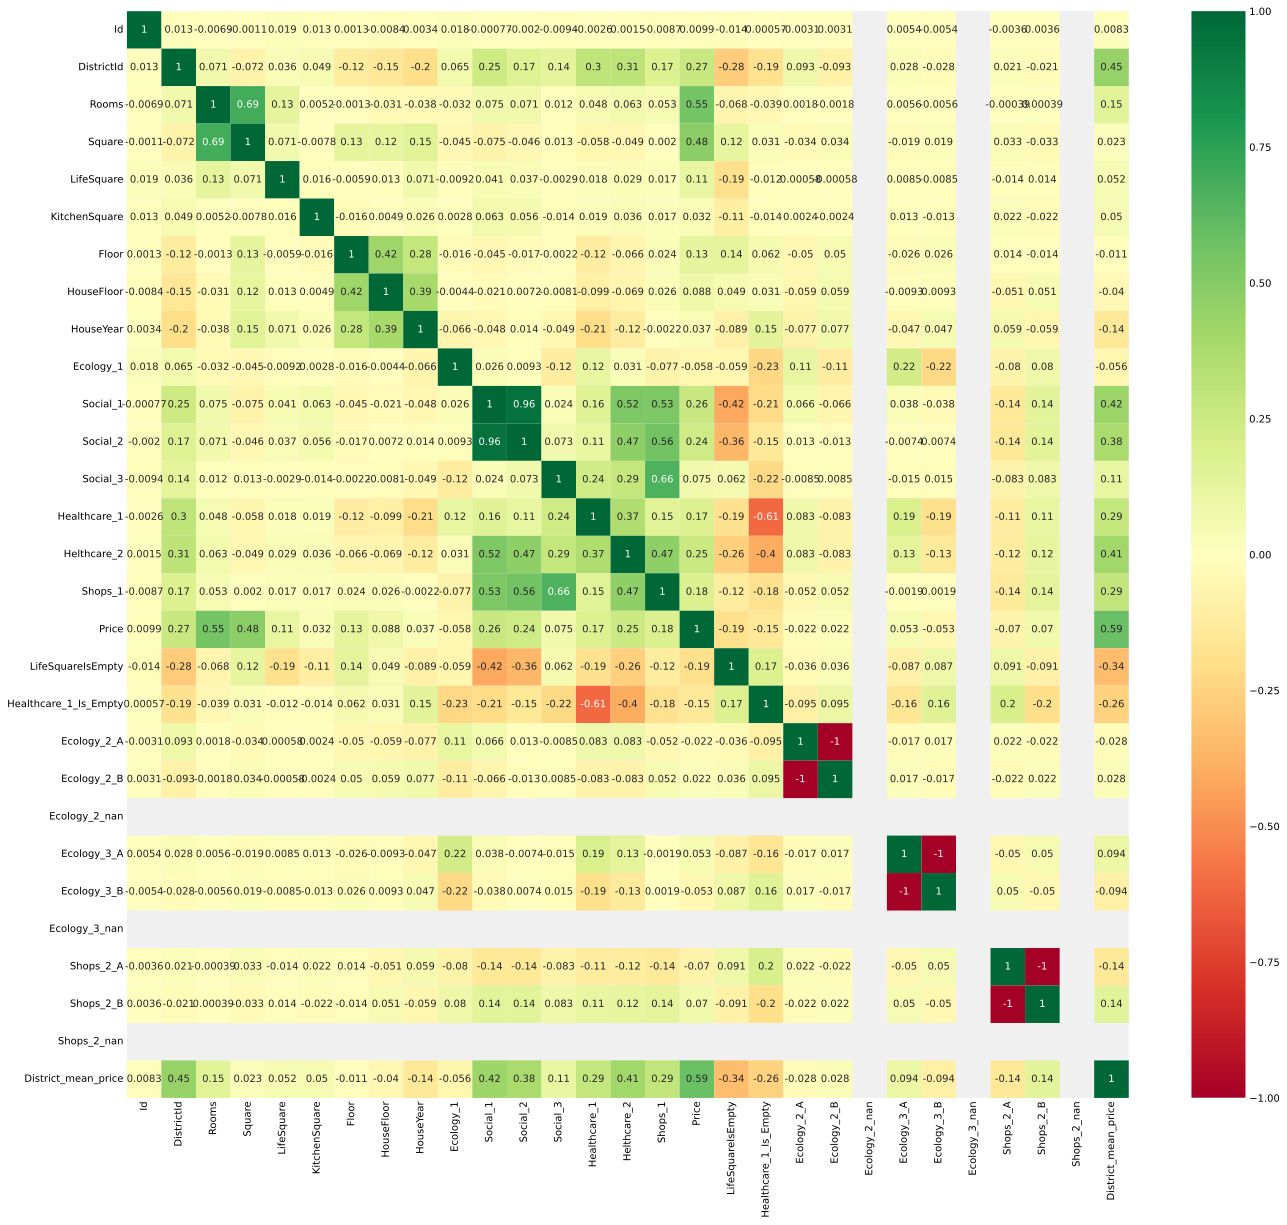

In [42]:
plt.figure(figsize=(20,20))
sns.heatmap(dataset_train.corr(), 
            xticklabels=dataset_train.corr().columns, 
            yticklabels=dataset_train.corr().columns,
            cmap='RdYlGn', 
            center=0, 
            annot=True)
plt.show()

## Функция подсчёта эффетивности предсказания и отрисовка графика 
(честно стырено из примеров кода по курсу, простите)

In [43]:
def evaluate_preds(true_values, pred_values, save=False):
    """Оценка качества модели и график preds vs true"""
    
    print("R2:\t" + str(round(r2(true_values, pred_values), 3)) + "\n" +
          "RMSE:\t" + str(round(np.sqrt(mse(true_values, pred_values)), 3)) + "\n" +
          "MSE:\t" + str(round(mse(true_values, pred_values), 3))
         )
    
    plt.figure(figsize=(8,8))
    
    sns.scatterplot(x=pred_values, y=true_values)
    plt.plot([0, 500000], [0, 500000], linestyle='--', color='black')  # диагональ, где true_values = pred_values
    
    plt.xlabel('Predicted values')
    plt.ylabel('True values')
    plt.title('True vs Predicted values')
    
    if save == True:
        plt.savefig(REPORTS_FILE_PATH + 'report.png')
    plt.show()

## Разбивка датасета тест на 2 датасета: тренировочный (66%) и тестовый (33%)

In [44]:
X, y = dataset_train.drop('Price', axis=1), dataset_train['Price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, shuffle=True, random_state=42)

Проверки: 
LinearRegression: R2: 0.636, низкое значение на трейне, R2: 0.302 на тесте.
DecisionTreeRegressor: R2: 0.761 неплохое значение на трейне, R2: 0.629 на тесте - для сдачи курсовой приемлимо, но можно и лучше.
RandomForestRegressor: R2: 0.744 хуже, чем предыдущая на трейне, однако, R2: 0.671 на тесте, на 4,2% лучше предыдущей, пробуем дальше.
GradientBoostingRegressor: R2: 0.899 очень неплохой показатель, похоже на overfitting на трейне, R2: 0.72 на тесте - лучший результат, используем эту модель для предсказания.


R2:	0.897
RMSE:	29354.173
MSE:	861667447.346


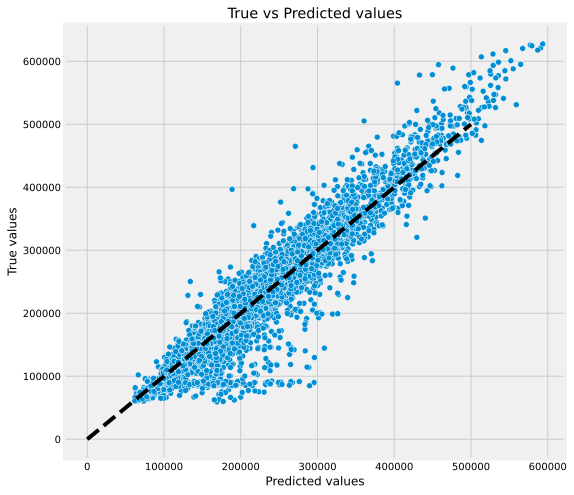

In [45]:
# GradientBoostingRegressor
gb_model = GradientBoostingRegressor(criterion='mse',
                                     max_depth=5,
                                     min_samples_leaf=3,
                                     random_state=42,  
                                     n_estimators=170)
gb_model.fit(X_train, y_train)

y_train_preds = gb_model.predict(X_train)
evaluate_preds(y_train, y_train_preds)

R2:	0.717
RMSE:	51071.884
MSE:	2608337355.901


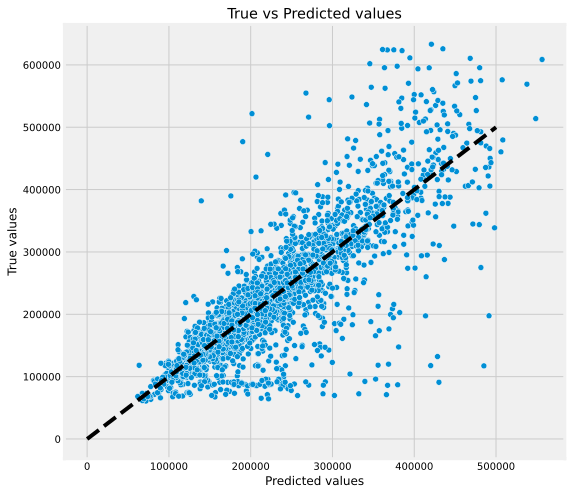

In [46]:
y_test_preds = gb_model.predict(X_test)
evaluate_preds(y_test, y_test_preds)

In [47]:
y_validate_preds = gb_model.predict(dataset_test)
dataset_test['Price'] = y_validate_preds

In [48]:
dataset_test.loc[:, ('Id', 'Price')].to_csv('dataset/answer.csv', index=False)

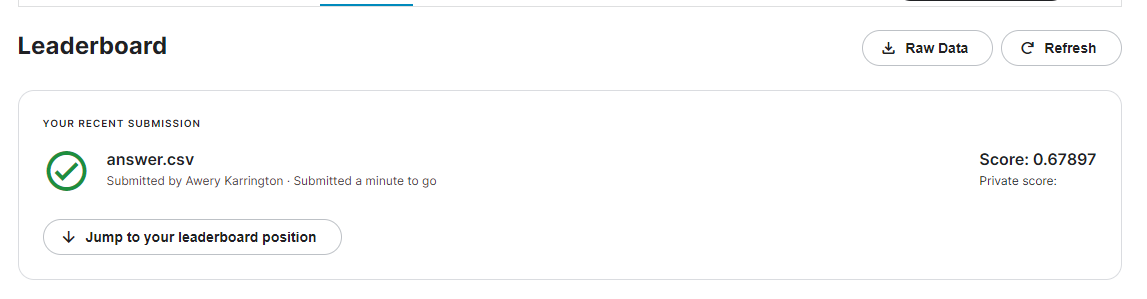

Score: 0.67897
Awery Karrington